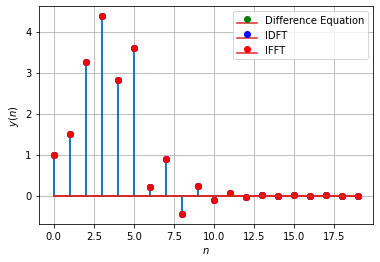

In [2]:
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft,ifft
import numpy as np
N = 20
n = np.arange(N)

def x(n):
    if n < 0 or n >5 :
        return 0
    elif n < 4:
        return n + 1
    else :
        return 6-n
def y(n):
    if n < 0:
        return 0
    else :
        return x(n) + x(n-2) - y(n-1)/2

def h(n):
    return u(n)*(-1/2)**n + u(n-2)*(-1/2)**(n-2)

def u(n):
    if n < 0 :
        return 0
    else :
        return 1

def X(k,N):
    sum  = 0
    for i in range(N):
        sum += x(i)*(np.exp(-1j*2*np.pi*i*k/N))
    return sum

def H(k,N):
    sum  = 0
    for i in range(N):
        sum += h(i)*(np.exp(-1j*2*np.pi*i*k/N))
    return sum

def Y(k,N):
    return H(k,N)*X(k,N)

def y_idft(n,N):
    sum = 0
    for i in range(N):
        sum+= Y(i,N)*np.exp((2j* np.pi *i*n)/N)
    return np.real(sum)/N


vec_h = scipy.vectorize(h)
vec_x = scipy.vectorize(x)
vec_y = scipy.vectorize(y)

x_arr = vec_x(n)

h_arr = vec_h(n)

#Using IFFT 
X_k = fft(x_arr)

H_k = fft(h_arr)

Y_k = X_k*H_k

y_n_ifft = ifft(Y_k)

#Using IDFT
vec_y_idft = scipy.vectorize(y_idft)

y_n_idft = vec_y_idft(n,N)

#Using Difference Equation
y_n_diff = vec_y(n)

#Plots

plt.stem(n,np.real(y_n_diff),markerfmt = 'go')
plt.stem(n,np.real(y_n_idft),markerfmt = 'bo')
plt.stem(n,np.real(y_n_ifft),markerfmt = 'ro')
plt.grid()
plt.xlabel("$n$")
plt.ylabel("$y(n)$")
plt.legend(["Difference Equation","IDFT","IFFT"])

# plt.savefig("../Figs/yn_ifft.png")
plt.show()

Text(0, 0.5, 'H(k)')

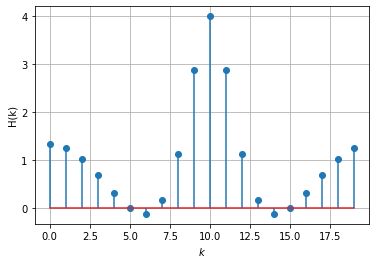

In [3]:
plt.stem(n,np.real(H_k))
plt.grid()
plt.xlabel("$k$")
plt.ylabel("H(k)")

Text(0, 0.5, 'X(k)')

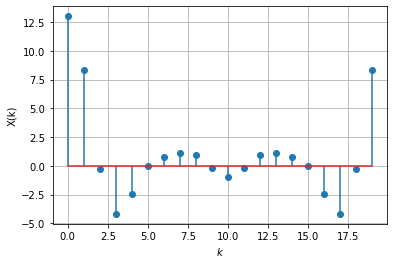

In [4]:
plt.stem(n,np.real(X_k))
plt.grid()
plt.xlabel("$k$")
plt.ylabel("X(k)")

Text(0, 0.5, 'Y(k)')

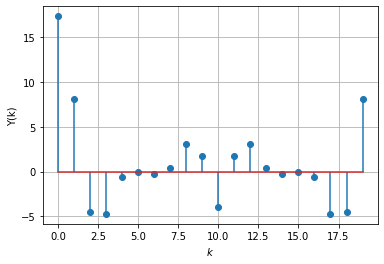

In [5]:
plt.stem(n,np.real(Y_k))
plt.grid()
plt.xlabel("$k$")
plt.ylabel("Y(k)")

In [6]:
import numpy as np
import time
def fft(arr):
    if len(arr)==1:
        return arr
    size = len(arr)//2
    left_arr = []
    right_arr = []
    for i in range(0, len(arr)):
        if i%2==0:
            left_arr.append(arr[i])
        else:
            right_arr.append(arr[i])
    left_arr = fft(left_arr)
    right_arr = fft(right_arr)
    n = len(arr)
    for i in range(0, len(arr)):
        arr[i] =  left_arr[i%(n//2)] + (np.e**(-2j*np.pi*i/n))*(right_arr[i%(n//2)])
    return arr

In [7]:
fft_x = fft([1,2,3,4,2,1,0,0])

In [8]:
from scipy.linalg import dft
times_dft = []
iterations = []
times_fft = []
for i in range(2, 502, 2):
    start_dft = time.time()
    x = np.linspace(1, i, i)
    y = dft(i)
    final = y@x
    end_dft = time.time()
    times_dft.append(end_dft - start_dft)
    start_fft = time.time()
    x = np.linspace(1, i, i)
    y = fft(x)
    end_fft = time.time()
    iterations.append(i)
    times_fft.append(end_fft - start_fft)


/tmp/ipykernel_100403/581535667.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  arr[i] =  left_arr[i%(n//2)] + (np.e**(-2j*np.pi*i/n))*(right_arr[i%(n//2)])


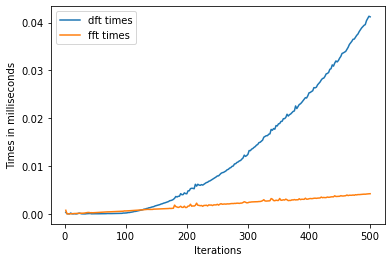

In [11]:
import matplotlib.pyplot as plt
plt.plot(iterations, times_dft, label='dft times')
plt.plot(iterations, times_fft, label='fft times')
plt.xlabel('Iterations')
plt.ylabel('Times in milliseconds')
plt.legend()
plt.savefig('../figs/dft_fft_times.png')